In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# csv 파일 읽어오기
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 결측치 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train['Survived'].unique()

array([0, 1], dtype=int64)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
# 성별에 따른 생존자여부
# 생존자의 성별
train[train['Survived']==1]['Sex'].value_counts()
train[train['Survived']==0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [11]:
s = train[train['Survived']==1]['Sex'].value_counts()
d = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df

,female,male
Survived,233,109
Dead,81,468


<AxesSubplot:xlabel='Survived', ylabel='count'>

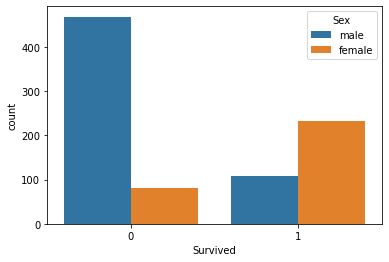

In [12]:
import seaborn as sns
sns.countplot(x=train['Survived'], hue=train['Sex'])

<AxesSubplot:>

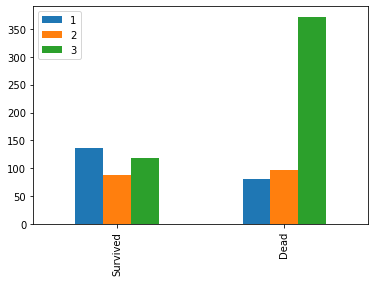

In [13]:
# 객실등급(Pclass)에 따른 생존여부
s = train[train['Survived']==1]['Pclass'].value_counts()
d = train[train['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df.plot(kind='bar')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

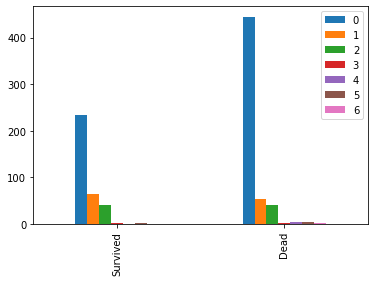

In [15]:
s = train[train['Survived']==1]['Parch'].value_counts()
d = train[train['Survived']==0]['Parch'].value_counts()
df = pd.DataFrame([s,d])
df.index = ['Survived', 'Dead']
df.plot(kind='bar')

In [16]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# 변수를 제거
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [18]:
test = test.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

In [19]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


In [20]:
train['Age'].isnull().sum()

177

In [21]:
# 성별에 따른 나이의 중간값으로 대체(결측치 처리)
train.groupby('Sex')['Age'].transform('median')
train['Age'].fillna(train.groupby('Sex')['Age'].transform('median'), inplace=True)
train['Age'].isnull().sum()

0

In [22]:
test['Age'].fillna(test.groupby('Sex')['Age'].transform('median'), inplace=True)
test['Age'].isnull().sum()

0

In [23]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [24]:
train['Age'].describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
train['Age'].value_counts()

29.00    144
27.00     71
24.00     30
22.00     27
18.00     26
        ... 
55.50      1
66.00      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [26]:
# 함수를 이용해서 Age를 범위값으로 변경
def ageTransform(v):
    category = 0
    if v <= 15: category = 0
    elif v <= 20: category = 1
    elif v <= 25: category = 2
    elif v <= 30: category = 3
    elif v <= 35: category = 4
    elif v <= 50: category = 5
    else : category = 6
    return category

In [27]:
train['Age']=train['Age'].apply(ageTransform)

In [28]:
test['Age']=test['Age'].apply(ageTransform)

In [29]:
train['Age'].value_counts()

3    285
5    153
2    122
1     96
4     88
0     83
6     64
Name: Age, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

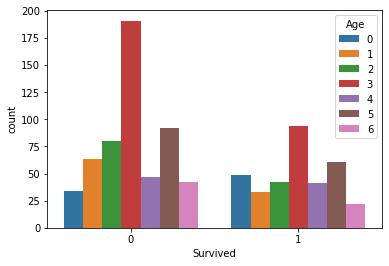

In [30]:
sns.countplot(x=train['Survived'], hue=train['Age'])

In [31]:
# 성별전처리
# male : 0 , female : 1
mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(mapping)

In [32]:
mapping = {'male':0, 'female':1}
test['Sex'] = test['Sex'].map(mapping)

In [33]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [34]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.047714,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.322998,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.079642,0.114631,0.245489,0.182333
Age,-0.047714,-0.322998,-0.079642,1.000000,-0.226106,-0.153641,0.096701
SibSp,-0.035322,0.083081,0.114631,-0.226106,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.153641,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096701,0.159651,0.216225,1.000000


In [35]:
# 자료형 변환
# Age의 자료형 float64 -> int64
train['Age'] = train['Age'].astype('int64')

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [37]:
# Embarked 결측치 처리
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train['Embarked'].isnull().sum()

2

In [39]:
# 탑승항구 결측치는 가장 갯수가 많은 S로 대체
train['Embarked'] = train['Embarked'].fillna('S')

In [40]:
mapping = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(mapping)

In [41]:
mapping = {'S':0, 'C':1, 'Q':2}
test['Embarked'] = test['Embarked'].map(mapping)

In [42]:
test['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [43]:
# 요금
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [44]:
# 요금 범위
# <=7, <=15, <=30, <=45, <=60, <=100, 나머지
def fareTransform(v):
    c = 0
    if v <= 7 : c = 0
    elif v <= 15 : c=1
    elif v <= 30 : c=2
    elif v <= 45 : c=3
    elif v <= 60 : c=4
    elif v <= 100 : c=5
    else : c=6
    return c

In [45]:
train['Fare'] = train['Fare'].apply(fareTransform)
test['Fare'] = test['Fare'].apply(fareTransform)

In [46]:
train['Fare'].value_counts()

1    430
2    199
5     69
3     63
6     53
4     49
0     28
Name: Fare, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

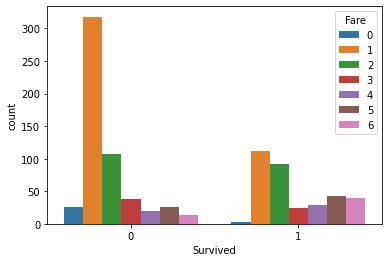

In [47]:
sns.countplot(x=train['Survived'], hue=train['Fare'])

In [48]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,5,1
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,4,1,0,4,0
4,0,3,"Allen, Mr. William Henry",0,4,0,0,1,0


In [49]:
train['Name'] = train['Name'].str.extract(' ([A-Za-z]+)\.')

In [50]:
test['Name'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

In [51]:
train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Ms            1
Capt          1
Mme           1
Sir           1
Lady          1
Countess      1
Don           1
Name: Name, dtype: int64

In [52]:
# 성별과 호칭 크로스 비교
pd.crosstab(train['Name'], train['Sex'])

Sex,0,1
Name,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [53]:
# Ms,Mlle,Mme -> Miss 치환
train['Name'] = train['Name'].str.replace('Ms', 'Miss')
train['Name'] = train['Name'].str.replace('Mlle', 'Miss')
train['Name'] = train['Name'].str.replace('Mme', 'Miss')

In [54]:
test['Name'] = test['Name'].str.replace('Ms', 'Miss')
test['Name'] = test['Name'].str.replace('Mlle', 'Miss')
test['Name'] = test['Name'].str.replace('Mme', 'Miss')

In [55]:
train['Name'].value_counts()

Mr          517
Miss        186
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Don           1
Jonkheer      1
Lady          1
Capt          1
Sir           1
Countess      1
Name: Name, dtype: int64

In [56]:
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


In [57]:
# Countess, Lady, Sir -> 성공
# Capt, Don, Jonkheer, Rev -> 실패
# Col, Dr, Major, Master -> 중간
train['Name'] = train['Name'].replace(['Countess','Lady','Sir'], 'Suc')
train['Name'] = train['Name'].replace(['Capt','Don','Jonkheer','Rev'], 'Fail')
train['Name'] = train['Name'].replace(['Col','Dr','Major','Master'], 'Med')

In [58]:
test['Name'] = test['Name'].replace(['Countess','Lady','Sir'], 'Suc')
test['Name'] = test['Name'].replace(['Capt','Don','Jonkheer','Rev'], 'Fail')
test['Name'] = test['Name'].replace(['Col','Dr','Major','Master'], 'Med')

In [59]:
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
Fail,0.000000
Med,0.549020
Miss,0.704301
Mr,0.156673
Mrs,0.792000
Suc,1.000000


In [60]:
mapping = {'Fail':0, 'Mr':1, 'Med':2, 'Miss':3, 'Mrs':4, 'Suc':5}
train['Name'] = train['Name'].map(mapping)
train[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
0,0.000000
1,0.156673
2,0.549020
3,0.704301
4,0.792000
5,1.000000


In [61]:
mapping = {'Fail':0, 'Mr':1, 'Med':2, 'Miss':3, 'Mrs':4, 'Suc':5}
test['Name'] = test['Name'].map(mapping)

In [62]:
test['Name'].value_counts()

1.0    240
3.0     79
4.0     72
2.0     24
0.0      2
Name: Name, dtype: int64

In [63]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,2,1,0,1,0
1,1,1,4,1,5,1,0,5,1
2,1,3,3,1,3,0,0,1,0
3,1,1,4,1,4,1,0,4,0
4,0,3,1,0,4,0,0,1,0


In [64]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,0,4,0,0,1,2
1,3,4.0,1,5,1,0,0,0
2,2,1.0,0,6,0,0,1,2
3,3,1.0,0,3,0,0,1,0
4,3,4.0,1,2,1,1,1,0


In [65]:
# 원핫인코딩
sex = pd.get_dummies(train['Sex'])
sex.columns = ['M','F']
train = pd.concat([train, sex], axis=1)

In [66]:
sex = pd.get_dummies(test['Sex'])
sex.columns = ['M','F']
test = pd.concat([test, sex], axis=1)

In [67]:
em = pd.get_dummies(train['Embarked'])
em.columns = ['S','Q','C']
train = pd.concat([train, em], axis=1)

In [68]:
em = pd.get_dummies(test['Embarked'])
em.columns = ['S','Q','C']
test = pd.concat([test, em], axis=1)

In [69]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,M,F,S,Q,C
0,0,3,1,0,2,1,0,1,0,1,0,1,0,0
1,1,1,4,1,5,1,0,5,1,0,1,0,1,0
2,1,3,3,1,3,0,0,1,0,0,1,1,0,0
3,1,1,4,1,4,1,0,4,0,0,1,1,0,0
4,0,3,1,0,4,0,0,1,0,1,0,1,0,0


In [70]:
# 원핫인코딩 후 기존 컬럼 삭제
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [71]:
test.drop(['Sex','Embarked'], axis=1, inplace=True)

In [72]:
train.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,0,3,1,2,1,0,1,1,0,1,0,0
1,1,1,4,5,1,0,5,0,1,0,1,0
2,1,3,3,3,0,0,1,0,1,1,0,0
3,1,1,4,4,1,0,4,0,1,1,0,0
4,0,3,1,4,0,0,1,1,0,1,0,0


In [73]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,M,F,S,Q,C
0,3,1.0,4,0,0,1,1,0,0,0,1
1,3,4.0,5,1,0,0,0,1,1,0,0
2,2,1.0,6,0,0,1,1,0,0,0,1
3,3,1.0,3,0,0,1,1,0,1,0,0
4,3,4.0,2,1,1,1,0,1,1,0,0


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Name      891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   M         891 non-null    uint8
 8   F         891 non-null    uint8
 9   S         891 non-null    uint8
 10  Q         891 non-null    uint8
 11  C         891 non-null    uint8
dtypes: int64(7), uint8(5)
memory usage: 53.2 KB


In [75]:
# 검증데이터 분리
from sklearn.model_selection import train_test_split

In [76]:
train_x, valid_x, train_y, valid_y = train_test_split(
    train.drop('Survived',1), train['Survived'], test_size = 0.2, random_state=10)

In [77]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((712, 11), (179, 11), (712,), (179,))

In [78]:
train_x = train_x.values.reshape(train_x.shape[0],11)
valid_x = valid_x.values.reshape(valid_x.shape[0],11)

In [79]:
train_x.shape, valid_x.shape

((712, 11), (179, 11))

In [80]:
import tensorflow as tf

In [81]:
# label(정답)의 categorical값 -> 원핫인코딩
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)

In [82]:
from tensorflow.keras.models import Sequential # 모델객체생성을 위한 클래스
from tensorflow.keras.layers import Dense # 레이어추가를 위한 클래스

In [90]:
tf.random.set_seed(11)

# 모델 구현
model = Sequential() # 객체 생성

# 데이터 입력받는 레이어
# Dense(출력데이터차원, 활성화함수, 입력데이터차원)
model.add(Dense(255, activation='relu', input_shape=(11,)))

# 레이어 추가
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='sigmoid'))


# 출력레이어
# label 값의 종류만큼 차원 지정
# 활성화함수 -> softmax
model.add(Dense(2, activation='softmax'))

# 모델 설정
# compile()
# 최적화기법 : adam(learning_rate=0.001)
# 손실함수 : categorical_crossentropy
# 평가지표 : accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
# 학습
# epochs : 학습횟수
# validation_data : 검증데이터
history = model.fit(train_x, train_y, epochs=500, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/500


ValueError: in user code:

    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\anconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\anconda\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\anconda\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\anconda\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\anconda\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\anconda\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\anconda\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 1) are incompatible


In [85]:
# 테스트데이터 평가
# 손실값, 정확도
model.evaluate(valid_x, valid_y)

6/6 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.8156


[0.637856125831604, 0.8156424760818481]

In [86]:
history.history

{'loss': [0.9365453124046326,
  0.7423365712165833,
  0.6605895757675171,
  0.6179795265197754,
  0.5586574673652649,
  0.49754059314727783,
  0.4598485231399536,
  0.4456310570240021,
  0.45352983474731445,
  0.4444984197616577,
  0.4316699802875519,
  0.4320768713951111,
  0.4284803867340088,
  0.42291760444641113,
  0.423485666513443,
  0.42269665002822876,
  0.4176326394081116,
  0.4160730242729187,
  0.4143371880054474,
  0.40873706340789795,
  0.4089609682559967,
  0.40649813413619995,
  0.4058102071285248,
  0.40709424018859863,
  0.4150928258895874,
  0.41517534852027893,
  0.4155352711677551,
  0.3977475166320801,
  0.3988906741142273,
  0.39749598503112793,
  0.39499035477638245,
  0.3914056122303009,
  0.3942519724369049,
  0.3916390538215637,
  0.39180225133895874,
  0.3856040835380554,
  0.3927122950553894,
  0.39409351348876953,
  0.3820795714855194,
  0.38266614079475403,
  0.38416358828544617,
  0.3790827989578247,
  0.3795661926269531,
  0.37938839197158813,
  0.378765

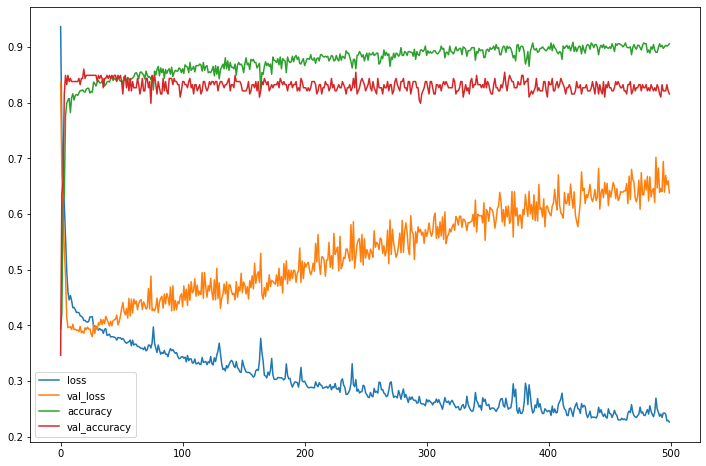

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()